In [14]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
import osmnx as ox
import geopandas as gpd
import networkx as nx

In [15]:
hospitals = pd.read_csv('/Users/muhammad-faaiz.shanawas/Documents/Live Projects/MCLP/data/cambridge_uni_hospital_sites.csv')
hospitals

,Code,Name,National Grouping,High Level Health Geography,Address Line 1,Address Line 2,Address Line 3,Address Line 4,Address Line 5,Postcode,Open Date,Close Date,Organisation Sub-Type Code,Parent Org Code
0,A6B3B,CUH AT MEADOWS COMMUNITY CENTRE,Y61,QUE,1 ST. CATHARINES ROAD,NaN,NaN,CAMBRIDGE,NaN,CB4 3XJ,20211001,NaN,NaN,RGT
1,A9J5N,CUH AT ROSMINI CENTRE,Y61,QUE,69A QUEENS ROAD,NaN,NaN,WISBECH,NaN,PE13 2PH,20220401,NaN,NaN,RGT
2,B1C9Z,CUH AT SPECSAVERS ROYSTON,Y61,QUE,27A-27B HIGH STREET,NaN,NaN,ROYSTON,NaN,SG8 9AA,20220401,NaN,NaN,RGT
3,B5D1I,CUH AT DODDINGTON HOSPITAL,Y61,QUE,BENWICK ROAD,DODDINGTON,NaN,MARCH,NaN,PE15 0UG,20210401,NaN,NaN,RGT
4,C5Z7J,CAMBRIDGE BIOMEDICAL RESEARCH CENTRE - VALNEVA...,Y61,QUE,HILLS ROAD,NaN,NaN,CAMBRIDGE,NaN,CB2 0QQ,20210401,NaN,NaN,RGT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,RGT98,NUFFIELD HEALTH CAMBRIDGE HOSPITAL,Y61,QUE,4 TRUMPINGTON ROAD,NaN,NaN,CAMBRIDGE,CAMBRIDGESHIRE,CB2 8AF,20121001,NaN,NaN,RGT
174,RGT99,ST MARY'S SURGERY,Y61,QUE,37 ST. MARYS STREET,NaN,NaN,ELY,CAMBRIDGESHIRE,CB7 4HF,20121001,NaN,NaN,RGT
175,T4O3M,CUH AT COLCHESTER STARS,Y61,QUE,5A QUEEN STREET,NaN,NaN,COLCHESTER,NaN,CO1 2PG,20210401,NaN,NaN,RGT
176,T8C3T,CUH AT ROYAL PAPWORTH HOSPITAL,Y61,QUE,PAPWORTH ROAD,CAMBRIDGE BIOMEDICAL CAMPUS,NaN,CAMBRIDGE,NaN,CB2 0AY,20201001,NaN,NaN,RGT


In [16]:
from pyrosm import OSM, get_data
import osmnx as ox


# Get all walkable roads and the nodes 

osmCambridge = OSM(get_data("Cambridge"))
nodes, edges = osmCambridge.get_network(nodes=True)

In [17]:
G = osmCambridge.to_graph(nodes, edges, graph_type="networkx")

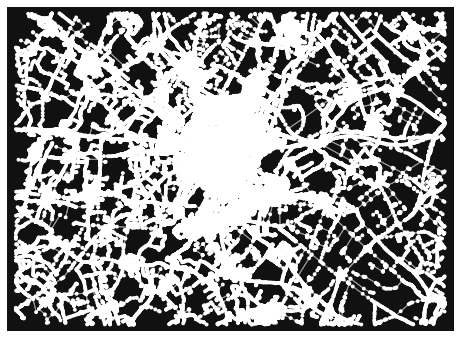

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [7]:
ox.plot_graph(G)

In [8]:
nodes

,lon,lat,tags,timestamp,version,changeset,id,geometry
0,0.216153,52.214178,None,0,0,0,608754,POINT (0.21615 52.21418)
1,0.214143,52.214083,None,0,0,0,620848,POINT (0.21414 52.21408)
2,0.212003,52.214070,None,0,0,0,320896594,POINT (0.21200 52.21407)
3,0.210962,52.214079,None,0,0,0,1554829608,POINT (0.21096 52.21408)
4,0.208786,52.214174,None,0,0,0,620850,POINT (0.20879 52.21417)
...,...,...,...,...,...,...,...,...
116879,0.141574,52.200280,None,0,0,0,10236374779,POINT (0.14157 52.20028)
116880,0.141210,52.199768,None,0,0,0,10236374780,POINT (0.14121 52.19977)
116881,0.147823,52.197895,None,0,0,0,10236424552,POINT (0.14782 52.19790)
116882,0.147553,52.197433,None,0,0,0,10236424553,POINT (0.14755 52.19743)


In [10]:
nodes_sample = nodes[['id', 'lon', 'lat']].sample(n = 100, random_state = 1234)
nodes_sample

,id,lon,lat
116093,10017900817,0.171538,52.156084
77111,2358595916,0.173058,52.210827
111126,8917419836,0.034319,52.252798
109506,8646341387,0.095044,52.123860
2308,2449309492,0.172541,52.194315
...,...,...,...
114351,9502814164,-0.029176,52.195292
48143,1042005571,0.110859,52.223313
5227,1047229663,0.135041,52.207716
113252,9248655595,0.092039,52.223066


In [18]:
source_address1 = hospitals['Address Line 1'][0] + ', Cambridge'
source_address2 = hospitals['Address Line 1'][4] + ', Cambridge'
source_address3 = hospitals['Address Line 1'][173] + ', Cambridge'
source_address4 = hospitals['Address Line 1'][177] + ', Cambridge'
target_address = hospitals['Address Line 1'][176] + ', Cambridge'
target_address


'PAPWORTH ROAD, Cambridge'

In [19]:
source1 = ox.geocode(source_address1)
source2 = ox.geocode(source_address2)
source3 = ox.geocode(source_address3)
source4 = ox.geocode(source_address4)
target = ox.geocode(target_address)

In [20]:
source1

(52.2307786, 0.1170552)

In [21]:
source_node1 = ox.get_nearest_node(G, source1)
source_node2 = ox.get_nearest_node(G, source2)
source_node3 = ox.get_nearest_node(G, source3)
source_node4 = ox.get_nearest_node(G, source4)

target_node = ox.get_nearest_node(G, target)

/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/p

In [22]:
route1 = nx.shortest_path(G, source_node1, target_node, weight="length")
route2 = nx.shortest_path(G, source_node2, target_node, weight="length")
route3 = nx.shortest_path(G, source_node3, target_node, weight="length")
route4 = nx.shortest_path(G, source_node4, target_node, weight="length")

In [27]:
routes = [route1, route2, route3, route4]


rc = ['r','y','c','g']

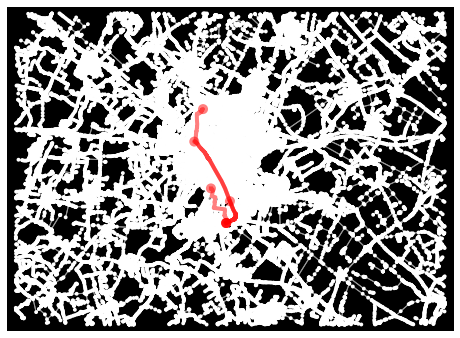

In [28]:
fig, ax = ox.plot_graph_routes(G, routes, route_color=rc, route_linewidth=6, bgcolor='k')

In [20]:
length1 = nx.shortest_path_length(G, source=source_node1, target=target_node, weight='length')
length2 = nx.shortest_path_length(G, source=source_node2, target=target_node, weight='length')
length3 = nx.shortest_path_length(G, source=source_node3, target=target_node, weight='length')
length4 = nx.shortest_path_length(G, source=source_node4, target=target_node, weight='length')

In [21]:
print(length1)
print(length2)
print(length3)
print(length4)

7910.671000000004
1733.3380000000002
2980.6189999999997
5816.598000000001


In [22]:
list_of_lengths = [length1, length2, length3, length4]

In [26]:
def create_score(list_of_lengths):
    score = 1000
    for l in list_of_lengths:
        deduction = (((l/1000)/4.5)*60) * 5 #get the length in km divide by speed 4.5 km/h then divide by 60 to get time in minutes
        score = score - deduction
        return score

In [15]:
nodes_sample['lat'].iloc[0]

52.1560843

In [44]:
def create_list_of_lengths(nodes_sample, target_node):
    list_of_lengths = []
    for idx in range(nodes_sample.shape[0]):
        coords = (nodes_sample['lat'].iloc[idx], nodes_sample['lon'].iloc[idx])
        node = ox.get_nearest_node(G, coords)
        length = nx.shortest_path_length(G, source=node, target=target_node, weight='length')
        list_of_lengths.append(length)
        idx += 1
    
    return list_of_lengths
    

In [39]:
nodes_sample.shape[0]

100

In [45]:
lengths_test = create_list_of_lengths(nodes_sample, target_node)
lengths_test

/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/p

[4018.566,
 5572.697000000004,
 12983.578999999992,
 7771.638999999999,
 4444.222000000002,
 4250.713000000001,
 8491.872999999994,
 9945.388000000006,
 10037.326000000005,
 7962.811999999992,
 4726.044000000001,
 5048.179,
 624.0600000000001,
 10464.19899999999,
 591.123,
 15091.070999999998,
 2109.2709999999993,
 5133.489999999999,
 12332.544000000002,
 4946.950000000003,
 2689.2210000000014,
 2929.684000000001,
 5126.113000000003,
 4194.83,
 12810.571000000004,
 7887.881000000005,
 7381.704000000002,
 17700.956,
 15394.706999999997,
 7886.538000000003,
 6859.196000000004,
 16430.176999999996,
 6678.737000000003,
 7765.741000000007,
 7817.224000000006,
 5740.427000000001,
 3035.618000000001,
 5480.439000000001,
 7242.548000000005,
 10167.509999999998,
 11129.164000000002,
 14253.634,
 9767.134000000007,
 14399.876,
 13966.498999999996,
 7772.182999999993,
 5972.585000000002,
 6094.615000000001,
 5961.977000000001,
 3362.1679999999997,
 14187.497999999998,
 2152.9139999999993,
 5199.5